In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.preprocessing import maxabs_scale

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv1D
from tensorflow.keras.layers import MaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [4]:
base_dir = path.join('..', 'data')
data_dir = path.join(base_dir, 'data_speech_commands_v0.02')
 
train_txt = path.join(data_dir, 'wav_train_16words.txt')
val_txt = path.join(data_dir, 'wav_validation_16words.txt')
test_txt = path.join(data_dir, 'wav_test_16words.txt')

train_data = np.load(path.join(data_dir, 'wav_train_data.npz'))
val_data = np.load(path.join(data_dir, 'wav_validation_data.npz'))
test_data = np.load(path.join(data_dir, 'wav_test_data.npz'))

In [5]:
x_train = train_data['x_train']
y_train = train_data['y_train']
x_val = val_data['x_val']
y_val = val_data['y_val']
x_test = test_data['x_test']
y_test = test_data['y_test']
y_table = test_data['table']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table.shape

((36805, 16000, 1),
 (36805,),
 (4293, 16000, 1),
 (4293,),
 (4815, 16000, 1),
 (4815,),
 (16, 2))

In [6]:
input_shape = x_test[0].shape
output_size = y_table.shape[0]

In [7]:
x_train_abs = np.asarray([maxabs_scale(wav) for wav in x_train])
y_train_onehot = np.asarray([to_categorical(label, output_size) for label in y_train])
del x_train, y_train

x_val_abs = np.asarray([maxabs_scale(wav) for wav in x_val])
y_val_onehot = np.asarray([to_categorical(label, output_size) for label in y_val])
del x_val, y_val

x_test_abs = np.asarray([maxabs_scale(wav) for wav in x_test])
y_test_onehot = np.asarray([to_categorical(label, output_size) for label in y_test])
del x_test, y_test

In [8]:
def build_1d_cnn_custom_DO_075_DO(conv_num=1):
    model=Sequential()
    model.add(Conv1D (kernel_size=5, filters=64, strides=1, padding='same', input_shape=input_shape)) 
    model.add(Activation('relu'))
#     model.add(MaxPooling1D(pool_size=3, strides=3, padding='same'))
    
    for i in range(conv_num-1):
        model.add(Conv1D (kernel_size=5, filters=64*(2**int((i+1)/4)), 
                          strides=1, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling1D(pool_size=3, strides=3))

    model.add(Flatten())
    
    model.add(Dropout(0.75))
    model.add(Dense(output_size, activation='softmax' ))
    
    return model

In [9]:
for i in range(1, 10):
    model = build_1d_cnn_custom_DO_075_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16000, 64)         384       
_________________________________________________________________
activation (Activation)      (None, 16000, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024000)           0         
_________________________________________________________________
dropout (Dropout)            (None, 1024000)           0         
_________________________________________________________________
dense (Dense)                (None, 16)                16384016  
Total params: 16,384,400
Trainable params: 16,384,400
Non-trainable params: 0
_________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
activation_15 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
activation_16 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 5333, 64)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 5333, 64)          20544     
_________________________________________________________________
activation_17 (Activation)   (None, 5333, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
activation_36 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
activation_37 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 5333, 64)          0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 5333, 64)          20544     
_________________________________________________________________
activation_38 (Activation)   (None, 5333, 64)          0         
__________

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 36805 samples, validate on 4293 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
36736/36805 [============================>.] - ETA: 0s - loss: 2.4450 - acc: 0.2366
Epoch 00001: val_loss improved from inf to 2.27126, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_1_conv_checkpoint/001-2.2713.hdf5
36805/36805 [==============================] - 29s 794us/sample - loss: 2.4446 - acc: 0.2368 - val_loss: 2.2713 - val_acc: 0.3173
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.0350 - acc: 0.3959
Epoch 00002: val_loss improved from 2.27126 to 2.16076, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_1_conv_checkpoint/002-2.1608.hdf5
36805/36805 [==============================] - 28s 771us/sample - loss: 2.0350 - acc: 0.3959 - val_loss:

36800/36805 [============================>.] - ETA: 0s - loss: 0.3482 - acc: 0.9082
Epoch 00026: val_loss did not improve from 2.12478
36805/36805 [==============================] - 27s 742us/sample - loss: 0.3483 - acc: 0.9082 - val_loss: 2.9912 - val_acc: 0.3324
Epoch 27/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.3370 - acc: 0.9130
Epoch 00027: val_loss did not improve from 2.12478
36805/36805 [==============================] - 27s 744us/sample - loss: 0.3373 - acc: 0.9129 - val_loss: 3.0233 - val_acc: 0.3373
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3244 - acc: 0.9164
Epoch 00028: val_loss did not improve from 2.12478
36805/36805 [==============================] - 27s 742us/sample - loss: 0.3244 - acc: 0.9164 - val_loss: 3.0518 - val_acc: 0.3345
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3053 - acc: 0.9219
Epoch 00029: val_loss did not improve from 2.12478
36805/36805 [==================

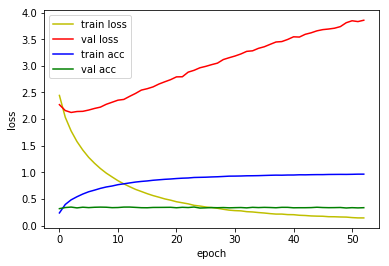

4815/4815 [==============================] - 1s 277us/sample - loss: 2.1406 - acc: 0.3267
Loss: 2.140593708267093 Accuracy: 0.32668743

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2879 - acc: 0.2913
Epoch 00001: val_loss improved from inf to 1.99661, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_2_conv_checkpoint/001-1.9966.hdf5
36805/36805 [==============================] - 42s 1ms/sample - loss: 2.2878 - acc: 0.2913 - val_loss: 1.9966 - val_acc: 0.4011
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8218 - acc: 0.4547
Epoch 00002: val_loss improved from 1.99661 to 1.79420, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_2_conv_checkpoint/002-1.7942.hdf5
36805/36805 [==============================] - 42s 1ms/sample - loss: 1.8219 - acc: 0.4546 - val_loss: 1.7942 - val_acc: 0.4673
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.

36800/36805 [============================>.] - ETA: 0s - loss: 0.2989 - acc: 0.9079
Epoch 00028: val_loss did not improve from 1.75349
36805/36805 [==============================] - 41s 1ms/sample - loss: 0.2989 - acc: 0.9079 - val_loss: 2.4710 - val_acc: 0.4670
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2926 - acc: 0.9110
Epoch 00029: val_loss did not improve from 1.75349
36805/36805 [==============================] - 41s 1ms/sample - loss: 0.2925 - acc: 0.9110 - val_loss: 2.4726 - val_acc: 0.4745
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2735 - acc: 0.9172
Epoch 00030: val_loss did not improve from 1.75349
36805/36805 [==============================] - 41s 1ms/sample - loss: 0.2735 - acc: 0.9172 - val_loss: 2.4412 - val_acc: 0.4801
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2742 - acc: 0.9166
Epoch 00031: val_loss did not improve from 1.75349
36805/36805 [========================

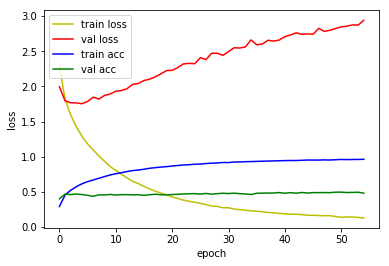

4815/4815 [==============================] - 2s 468us/sample - loss: 1.8014 - acc: 0.4496
Loss: 1.8014415986812746 Accuracy: 0.44963655

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2197 - acc: 0.3011
Epoch 00001: val_loss improved from inf to 1.80300, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_3_conv_checkpoint/001-1.8030.hdf5
36805/36805 [==============================] - 48s 1ms/sample - loss: 2.2196 - acc: 0.3011 - val_loss: 1.8030 - val_acc: 0.4545
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.6413 - acc: 0.4965
Epoch 00002: val_loss improved from 1.80300 to 1.53133, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_3_conv_checkpoint/002-1.5313.hdf5
36805/36805 [==============================] - 47s 1ms/sample - loss: 1.6412 - acc: 0.4965 - val_loss: 1.5313 - val_acc: 0.5386
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1

36800/36805 [============================>.] - ETA: 0s - loss: 0.3934 - acc: 0.8717
Epoch 00027: val_loss did not improve from 1.30512
36805/36805 [==============================] - 47s 1ms/sample - loss: 0.3934 - acc: 0.8717 - val_loss: 1.4162 - val_acc: 0.6403
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3806 - acc: 0.8758
Epoch 00028: val_loss did not improve from 1.30512
36805/36805 [==============================] - 47s 1ms/sample - loss: 0.3811 - acc: 0.8758 - val_loss: 1.4108 - val_acc: 0.6448
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3708 - acc: 0.8791
Epoch 00029: val_loss did not improve from 1.30512
36805/36805 [==============================] - 47s 1ms/sample - loss: 0.3708 - acc: 0.8791 - val_loss: 1.4415 - val_acc: 0.6438
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3539 - acc: 0.8842
Epoch 00030: val_loss did not improve from 1.30512
36805/36805 [========================

Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1891 - acc: 0.9408
Epoch 00057: val_loss did not improve from 1.30512
36805/36805 [==============================] - 47s 1ms/sample - loss: 0.1891 - acc: 0.9408 - val_loss: 1.5735 - val_acc: 0.6709
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1813 - acc: 0.9433
Epoch 00058: val_loss did not improve from 1.30512
36805/36805 [==============================] - 47s 1ms/sample - loss: 0.1816 - acc: 0.9433 - val_loss: 1.6326 - val_acc: 0.6606
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1854 - acc: 0.9424
Epoch 00059: val_loss did not improve from 1.30512
36805/36805 [==============================] - 47s 1ms/sample - loss: 0.1854 - acc: 0.9424 - val_loss: 1.5611 - val_acc: 0.6804
Epoch 60/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1737 - acc: 0.9458
Epoch 00060: val_loss did not improve from 1.30512
36805/36805 [===========

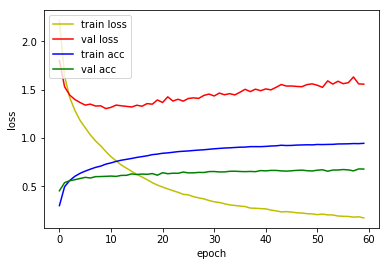

4815/4815 [==============================] - 3s 547us/sample - loss: 1.3782 - acc: 0.5736
Loss: 1.3782013468529453 Accuracy: 0.5736241

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2086 - acc: 0.2812
Epoch 00001: val_loss improved from inf to 1.72490, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_4_conv_checkpoint/001-1.7249.hdf5
36805/36805 [==============================] - 51s 1ms/sample - loss: 2.2086 - acc: 0.2812 - val_loss: 1.7249 - val_acc: 0.4689
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.6479 - acc: 0.4679
Epoch 00002: val_loss improved from 1.72490 to 1.49909, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_4_conv_checkpoint/002-1.4991.hdf5
36805/36805 [==============================] - 49s 1ms/sample - loss: 1.6478 - acc: 0.4680 - val_loss: 1.4991 - val_acc: 0.5302
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.

36800/36805 [============================>.] - ETA: 0s - loss: 0.4797 - acc: 0.8470
Epoch 00024: val_loss did not improve from 0.80680
36805/36805 [==============================] - 48s 1ms/sample - loss: 0.4797 - acc: 0.8470 - val_loss: 0.8083 - val_acc: 0.7703
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4659 - acc: 0.8524
Epoch 00025: val_loss did not improve from 0.80680
36805/36805 [==============================] - 49s 1ms/sample - loss: 0.4660 - acc: 0.8523 - val_loss: 0.8217 - val_acc: 0.7633
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4530 - acc: 0.8533
Epoch 00026: val_loss did not improve from 0.80680
36805/36805 [==============================] - 48s 1ms/sample - loss: 0.4530 - acc: 0.8533 - val_loss: 0.8114 - val_acc: 0.7724
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4376 - acc: 0.8601
Epoch 00027: val_loss did not improve from 0.80680
36805/36805 [========================

36800/36805 [============================>.] - ETA: 0s - loss: 0.2567 - acc: 0.9156
Epoch 00053: val_loss did not improve from 0.78722
36805/36805 [==============================] - 48s 1ms/sample - loss: 0.2567 - acc: 0.9156 - val_loss: 0.8490 - val_acc: 0.7864
Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2567 - acc: 0.9148
Epoch 00054: val_loss did not improve from 0.78722
36805/36805 [==============================] - 48s 1ms/sample - loss: 0.2567 - acc: 0.9148 - val_loss: 0.8628 - val_acc: 0.7859
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2527 - acc: 0.9154
Epoch 00055: val_loss did not improve from 0.78722
36805/36805 [==============================] - 48s 1ms/sample - loss: 0.2528 - acc: 0.9154 - val_loss: 0.8261 - val_acc: 0.7966
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2533 - acc: 0.9163
Epoch 00056: val_loss did not improve from 0.78722
36805/36805 [========================

Epoch 83/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1988 - acc: 0.9334
Epoch 00083: val_loss did not improve from 0.78722
36805/36805 [==============================] - 48s 1ms/sample - loss: 0.1987 - acc: 0.9334 - val_loss: 0.8086 - val_acc: 0.8097
Epoch 84/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1884 - acc: 0.9378
Epoch 00084: val_loss did not improve from 0.78722
36805/36805 [==============================] - 48s 1ms/sample - loss: 0.1884 - acc: 0.9378 - val_loss: 0.8163 - val_acc: 0.8090

1D_CNN_custom_DO_075_DO_4_conv Model


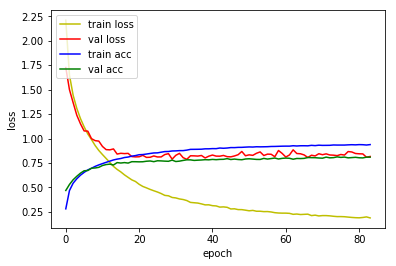

4815/4815 [==============================] - 3s 566us/sample - loss: 0.8739 - acc: 0.7533
Loss: 0.8739451072173946 Accuracy: 0.75327104

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2048 - acc: 0.2775
Epoch 00001: val_loss improved from inf to 1.65095, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_5_conv_checkpoint/001-1.6509.hdf5
36805/36805 [==============================] - 52s 1ms/sample - loss: 2.2047 - acc: 0.2775 - val_loss: 1.6509 - val_acc: 0.4794
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.5833 - acc: 0.4867
Epoch 00002: val_loss improved from 1.65095 to 1.37802, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_5_conv_checkpoint/002-1.3780.hdf5
36805/36805 [==============================] - 51s 1ms/sample - loss: 1.5834 - acc: 0.4867 - val_loss: 1.3780 - val_acc: 0.5614
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1

Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4474 - acc: 0.8599
Epoch 00024: val_loss did not improve from 0.60264
36805/36805 [==============================] - 50s 1ms/sample - loss: 0.4474 - acc: 0.8599 - val_loss: 0.6589 - val_acc: 0.8171
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4408 - acc: 0.8631
Epoch 00025: val_loss did not improve from 0.60264
36805/36805 [==============================] - 50s 1ms/sample - loss: 0.4408 - acc: 0.8631 - val_loss: 0.6072 - val_acc: 0.8314
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4244 - acc: 0.8678
Epoch 00026: val_loss improved from 0.60264 to 0.60255, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_5_conv_checkpoint/026-0.6026.hdf5
36805/36805 [==============================] - 50s 1ms/sample - loss: 0.4244 - acc: 0.8678 - val_loss: 0.6026 - val_acc: 0.8355
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 

Epoch 52/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2355 - acc: 0.9253
Epoch 00052: val_loss did not improve from 0.57528
36805/36805 [==============================] - 50s 1ms/sample - loss: 0.2354 - acc: 0.9253 - val_loss: 0.5781 - val_acc: 0.8581
Epoch 53/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2316 - acc: 0.9250
Epoch 00053: val_loss did not improve from 0.57528
36805/36805 [==============================] - 50s 1ms/sample - loss: 0.2318 - acc: 0.9250 - val_loss: 0.5811 - val_acc: 0.8602
Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2237 - acc: 0.9259
Epoch 00054: val_loss did not improve from 0.57528
36805/36805 [==============================] - 50s 1ms/sample - loss: 0.2236 - acc: 0.9259 - val_loss: 0.6134 - val_acc: 0.8591
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2247 - acc: 0.9261
Epoch 00055: val_loss did not improve from 0.57528
36805/36805 [===========

Epoch 82/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1649 - acc: 0.9474
Epoch 00082: val_loss did not improve from 0.57528
36805/36805 [==============================] - 50s 1ms/sample - loss: 0.1649 - acc: 0.9474 - val_loss: 0.6156 - val_acc: 0.8635
Epoch 83/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1647 - acc: 0.9461
Epoch 00083: val_loss did not improve from 0.57528
36805/36805 [==============================] - 50s 1ms/sample - loss: 0.1648 - acc: 0.9460 - val_loss: 0.6001 - val_acc: 0.8661
Epoch 84/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1618 - acc: 0.9471
Epoch 00084: val_loss did not improve from 0.57528
36805/36805 [==============================] - 50s 1ms/sample - loss: 0.1618 - acc: 0.9470 - val_loss: 0.6043 - val_acc: 0.8658
Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1591 - acc: 0.9472
Epoch 00085: val_loss did not improve from 0.57528
36805/36805 [===========

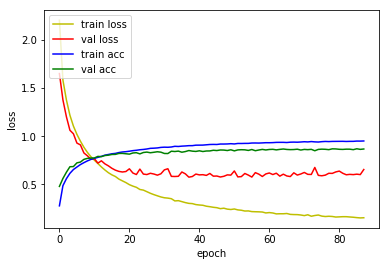

4815/4815 [==============================] - 3s 617us/sample - loss: 0.6760 - acc: 0.8116
Loss: 0.6760014045151842 Accuracy: 0.8116303

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.3947 - acc: 0.2121
Epoch 00001: val_loss improved from inf to 1.70095, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_6_conv_checkpoint/001-1.7010.hdf5
36805/36805 [==============================] - 53s 1ms/sample - loss: 2.3947 - acc: 0.2121 - val_loss: 1.7010 - val_acc: 0.4736
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.6621 - acc: 0.4557
Epoch 00002: val_loss improved from 1.70095 to 1.38410, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_6_conv_checkpoint/002-1.3841.hdf5
36805/36805 [==============================] - 51s 1ms/sample - loss: 1.6621 - acc: 0.4557 - val_loss: 1.3841 - val_acc: 0.5625
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.

Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4563 - acc: 0.8627
Epoch 00024: val_loss improved from 0.44222 to 0.40144, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_6_conv_checkpoint/024-0.4014.hdf5
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.4563 - acc: 0.8627 - val_loss: 0.4014 - val_acc: 0.8908
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4395 - acc: 0.8684
Epoch 00025: val_loss did not improve from 0.40144
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.4396 - acc: 0.8683 - val_loss: 0.4067 - val_acc: 0.8856
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4347 - acc: 0.8693
Epoch 00026: val_loss did not improve from 0.40144
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.4348 - acc: 0.8693 - val_loss: 0.4060 - val_acc: 0.8868
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 

Epoch 51/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2617 - acc: 0.9174
Epoch 00051: val_loss did not improve from 0.31736
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.2616 - acc: 0.9174 - val_loss: 0.3228 - val_acc: 0.9215
Epoch 52/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2566 - acc: 0.9191
Epoch 00052: val_loss did not improve from 0.31736
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.2565 - acc: 0.9191 - val_loss: 0.3266 - val_acc: 0.9178
Epoch 53/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2529 - acc: 0.9205
Epoch 00053: val_loss did not improve from 0.31736
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.2529 - acc: 0.9206 - val_loss: 0.3315 - val_acc: 0.9138
Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2465 - acc: 0.9218
Epoch 00054: val_loss improved from 0.31736 to 0.31219, saving model to mod

Epoch 80/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1828 - acc: 0.9420
Epoch 00080: val_loss improved from 0.29583 to 0.29366, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_6_conv_checkpoint/080-0.2937.hdf5
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1828 - acc: 0.9420 - val_loss: 0.2937 - val_acc: 0.9259
Epoch 81/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1752 - acc: 0.9428
Epoch 00081: val_loss did not improve from 0.29366
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1754 - acc: 0.9428 - val_loss: 0.2949 - val_acc: 0.9317
Epoch 82/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1759 - acc: 0.9430
Epoch 00082: val_loss did not improve from 0.29366
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1759 - acc: 0.9430 - val_loss: 0.3027 - val_acc: 0.9273
Epoch 83/500
36800/36805 [============================>.] - ETA: 0s - loss: 

Epoch 109/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1390 - acc: 0.9546
Epoch 00109: val_loss did not improve from 0.28990
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1390 - acc: 0.9546 - val_loss: 0.3032 - val_acc: 0.9362
Epoch 110/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1328 - acc: 0.9575
Epoch 00110: val_loss did not improve from 0.28990
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1328 - acc: 0.9575 - val_loss: 0.3114 - val_acc: 0.9301
Epoch 111/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1337 - acc: 0.9561
Epoch 00111: val_loss did not improve from 0.28990
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1338 - acc: 0.9561 - val_loss: 0.3251 - val_acc: 0.9324
Epoch 112/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1327 - acc: 0.9563
Epoch 00112: val_loss did not improve from 0.28990
36805/36805 [=======

Epoch 139/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1058 - acc: 0.9652
Epoch 00139: val_loss did not improve from 0.28990
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1058 - acc: 0.9652 - val_loss: 0.3366 - val_acc: 0.9311
Epoch 140/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1098 - acc: 0.9637
Epoch 00140: val_loss did not improve from 0.28990
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1098 - acc: 0.9637 - val_loss: 0.2956 - val_acc: 0.9373
Epoch 141/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1085 - acc: 0.9640
Epoch 00141: val_loss did not improve from 0.28990
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1085 - acc: 0.9640 - val_loss: 0.3128 - val_acc: 0.9341
Epoch 142/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1018 - acc: 0.9654
Epoch 00142: val_loss did not improve from 0.28990
36805/36805 [=======

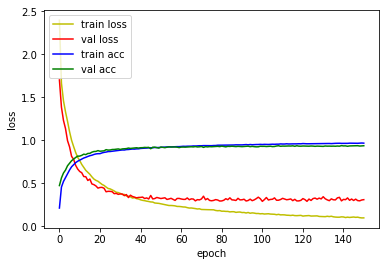

4815/4815 [==============================] - 3s 609us/sample - loss: 0.3295 - acc: 0.9061
Loss: 0.3295267518683262 Accuracy: 0.9061267

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.4773 - acc: 0.1800
Epoch 00001: val_loss improved from inf to 1.81089, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_7_conv_checkpoint/001-1.8109.hdf5
36805/36805 [==============================] - 55s 1ms/sample - loss: 2.4772 - acc: 0.1800 - val_loss: 1.8109 - val_acc: 0.4556
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.7602 - acc: 0.4166
Epoch 00002: val_loss improved from 1.81089 to 1.33956, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_7_conv_checkpoint/002-1.3396.hdf5
36805/36805 [==============================] - 52s 1ms/sample - loss: 1.7601 - acc: 0.4166 - val_loss: 1.3396 - val_acc: 0.5875
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.

Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3725 - acc: 0.8862
Epoch 00024: val_loss improved from 0.25394 to 0.25013, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_7_conv_checkpoint/024-0.2501.hdf5
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.3725 - acc: 0.8862 - val_loss: 0.2501 - val_acc: 0.9304
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3626 - acc: 0.8881
Epoch 00025: val_loss did not improve from 0.25013
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.3626 - acc: 0.8881 - val_loss: 0.2510 - val_acc: 0.9322
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3549 - acc: 0.8899
Epoch 00026: val_loss improved from 0.25013 to 0.24135, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_7_conv_checkpoint/026-0.2413.hdf5
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.3549 - acc: 0.8900 - val_loss: 0.241

36800/36805 [============================>.] - ETA: 0s - loss: 0.2179 - acc: 0.9308
Epoch 00050: val_loss did not improve from 0.17646
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.2180 - acc: 0.9307 - val_loss: 0.1791 - val_acc: 0.9527
Epoch 51/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2193 - acc: 0.9286
Epoch 00051: val_loss improved from 0.17646 to 0.17429, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_7_conv_checkpoint/051-0.1743.hdf5
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.2193 - acc: 0.9286 - val_loss: 0.1743 - val_acc: 0.9502
Epoch 52/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2055 - acc: 0.9329
Epoch 00052: val_loss did not improve from 0.17429
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.2055 - acc: 0.9329 - val_loss: 0.1776 - val_acc: 0.9509
Epoch 53/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2080 - acc:

Epoch 78/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1507 - acc: 0.9505
Epoch 00078: val_loss did not improve from 0.15267
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1507 - acc: 0.9505 - val_loss: 0.1647 - val_acc: 0.9590
Epoch 79/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1520 - acc: 0.9508
Epoch 00079: val_loss did not improve from 0.15267
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1520 - acc: 0.9508 - val_loss: 0.1557 - val_acc: 0.9576
Epoch 80/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1388 - acc: 0.9539
Epoch 00080: val_loss did not improve from 0.15267
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1388 - acc: 0.9539 - val_loss: 0.1571 - val_acc: 0.9595
Epoch 81/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1473 - acc: 0.9495
Epoch 00081: val_loss did not improve from 0.15267
36805/36805 [===========

Epoch 107/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1103 - acc: 0.9621
Epoch 00107: val_loss did not improve from 0.14820
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.1103 - acc: 0.9622 - val_loss: 0.1621 - val_acc: 0.9588
Epoch 108/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1070 - acc: 0.9635
Epoch 00108: val_loss did not improve from 0.14820
36805/36805 [==============================] - 51s 1ms/sample - loss: 0.1070 - acc: 0.9635 - val_loss: 0.1598 - val_acc: 0.9620
Epoch 109/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1063 - acc: 0.9640
Epoch 00109: val_loss did not improve from 0.14820
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.1063 - acc: 0.9640 - val_loss: 0.1552 - val_acc: 0.9588
Epoch 110/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1061 - acc: 0.9645
Epoch 00110: val_loss did not improve from 0.14820
36805/36805 [=======


1D_CNN_custom_DO_075_DO_7_conv Model


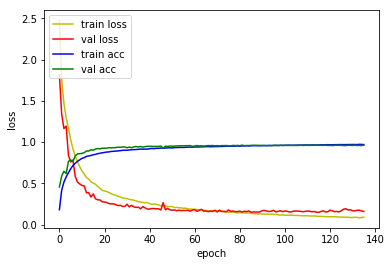

4815/4815 [==============================] - 3s 667us/sample - loss: 0.1871 - acc: 0.9450
Loss: 0.18708164378118664 Accuracy: 0.94496363

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.4701 - acc: 0.1823
Epoch 00001: val_loss improved from inf to 1.72356, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_8_conv_checkpoint/001-1.7236.hdf5
36805/36805 [==============================] - 57s 2ms/sample - loss: 2.4701 - acc: 0.1823 - val_loss: 1.7236 - val_acc: 0.4822
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.7407 - acc: 0.4269
Epoch 00002: val_loss improved from 1.72356 to 1.22502, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_8_conv_checkpoint/002-1.2250.hdf5
36805/36805 [==============================] - 52s 1ms/sample - loss: 1.7407 - acc: 0.4270 - val_loss: 1.2250 - val_acc: 0.6303
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 

36800/36805 [============================>.] - ETA: 0s - loss: 0.2891 - acc: 0.9101
Epoch 00023: val_loss did not improve from 0.15658
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.2891 - acc: 0.9101 - val_loss: 0.1639 - val_acc: 0.9515
Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2784 - acc: 0.9147
Epoch 00024: val_loss did not improve from 0.15658
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.2783 - acc: 0.9147 - val_loss: 0.1626 - val_acc: 0.9525
Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2652 - acc: 0.9176
Epoch 00025: val_loss did not improve from 0.15658
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.2652 - acc: 0.9176 - val_loss: 0.1728 - val_acc: 0.9462
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2641 - acc: 0.9177
Epoch 00026: val_loss improved from 0.15658 to 0.14755, saving model to model/checkpoint

Epoch 50/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1486 - acc: 0.9517
Epoch 00050: val_loss improved from 0.11607 to 0.10931, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_8_conv_checkpoint/050-0.1093.hdf5
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.1487 - acc: 0.9517 - val_loss: 0.1093 - val_acc: 0.9702
Epoch 51/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1459 - acc: 0.9526
Epoch 00051: val_loss did not improve from 0.10931
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.1459 - acc: 0.9526 - val_loss: 0.1310 - val_acc: 0.9641
Epoch 52/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1429 - acc: 0.9538
Epoch 00052: val_loss improved from 0.10931 to 0.10816, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_8_conv_checkpoint/052-0.1082.hdf5
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.1429 - acc: 0.9538 - val_loss: 0.108

Epoch 79/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0931 - acc: 0.9689
Epoch 00079: val_loss did not improve from 0.10593
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.0931 - acc: 0.9689 - val_loss: 0.1232 - val_acc: 0.9674
Epoch 80/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0881 - acc: 0.9712
Epoch 00080: val_loss did not improve from 0.10593
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.0881 - acc: 0.9713 - val_loss: 0.1070 - val_acc: 0.9688
Epoch 81/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0883 - acc: 0.9704
Epoch 00081: val_loss did not improve from 0.10593
36805/36805 [==============================] - 52s 1ms/sample - loss: 0.0883 - acc: 0.9704 - val_loss: 0.1227 - val_acc: 0.9672
Epoch 82/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0865 - acc: 0.9713
Epoch 00082: val_loss did not improve from 0.10593
36805/36805 [===========

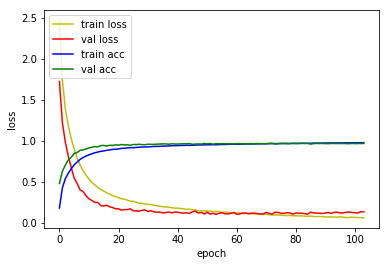

4815/4815 [==============================] - 3s 673us/sample - loss: 0.1568 - acc: 0.9539
Loss: 0.1568435341142977 Accuracy: 0.9538941

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2397 - acc: 0.2702
Epoch 00001: val_loss improved from inf to 1.31218, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_9_conv_checkpoint/001-1.3122.hdf5
36805/36805 [==============================] - 59s 2ms/sample - loss: 2.2396 - acc: 0.2703 - val_loss: 1.3122 - val_acc: 0.5884
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.2745 - acc: 0.5849
Epoch 00002: val_loss improved from 1.31218 to 1.01367, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_9_conv_checkpoint/002-1.0137.hdf5
36805/36805 [==============================] - 53s 1ms/sample - loss: 1.2744 - acc: 0.5849 - val_loss: 1.0137 - val_acc: 0.6713
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.

Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1808 - acc: 0.9427
Epoch 00025: val_loss did not improve from 0.14363
36805/36805 [==============================] - 53s 1ms/sample - loss: 0.1810 - acc: 0.9427 - val_loss: 0.1446 - val_acc: 0.9590
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1712 - acc: 0.9448
Epoch 00026: val_loss improved from 0.14363 to 0.12812, saving model to model/checkpoint/1D_CNN_custom_DO_075_DO_9_conv_checkpoint/026-0.1281.hdf5
36805/36805 [==============================] - 53s 1ms/sample - loss: 0.1712 - acc: 0.9448 - val_loss: 0.1281 - val_acc: 0.9625
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1645 - acc: 0.9480
Epoch 00027: val_loss did not improve from 0.12812
36805/36805 [==============================] - 53s 1ms/sample - loss: 0.1645 - acc: 0.9480 - val_loss: 0.1301 - val_acc: 0.9625
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 

Epoch 53/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0735 - acc: 0.9759
Epoch 00053: val_loss did not improve from 0.11182
36805/36805 [==============================] - 53s 1ms/sample - loss: 0.0735 - acc: 0.9759 - val_loss: 0.1425 - val_acc: 0.9639
Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0692 - acc: 0.9776
Epoch 00054: val_loss did not improve from 0.11182
36805/36805 [==============================] - 53s 1ms/sample - loss: 0.0692 - acc: 0.9776 - val_loss: 0.1459 - val_acc: 0.9646
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0704 - acc: 0.9765
Epoch 00055: val_loss did not improve from 0.11182
36805/36805 [==============================] - 53s 1ms/sample - loss: 0.0704 - acc: 0.9765 - val_loss: 0.1266 - val_acc: 0.9665
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0624 - acc: 0.9786
Epoch 00056: val_loss did not improve from 0.11182
36805/36805 [===========

Epoch 83/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0357 - acc: 0.9882
Epoch 00083: val_loss did not improve from 0.11182
36805/36805 [==============================] - 53s 1ms/sample - loss: 0.0357 - acc: 0.9882 - val_loss: 0.1699 - val_acc: 0.9662
Epoch 84/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0369 - acc: 0.9880
Epoch 00084: val_loss did not improve from 0.11182
36805/36805 [==============================] - 53s 1ms/sample - loss: 0.0369 - acc: 0.9880 - val_loss: 0.1300 - val_acc: 0.9709
Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0360 - acc: 0.9880
Epoch 00085: val_loss did not improve from 0.11182
36805/36805 [==============================] - 53s 1ms/sample - loss: 0.0360 - acc: 0.9880 - val_loss: 0.1457 - val_acc: 0.9706
Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0371 - acc: 0.9874
Epoch 00086: val_loss did not improve from 0.11182
36805/36805 [===========

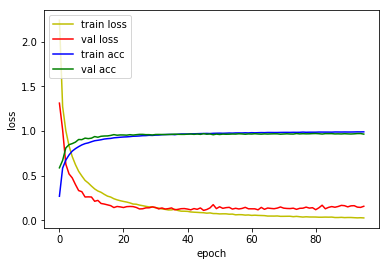

4815/4815 [==============================] - 3s 666us/sample - loss: 0.1723 - acc: 0.9522
Loss: 0.17226057962687572 Accuracy: 0.9522326



In [9]:
for i in range(1, 10):
    base = '1D_CNN_custom_DO_075_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_1d_cnn_custom_DO_075_DO(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train_abs, y_train_onehot, batch_size=64, epochs=500, 
                     validation_data=[x_val_abs, y_val_onehot], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [10]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = '1D_CNN_custom_DO_075_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(1, 10):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_DO_075_DO_1_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16000, 64)         384       
_________________________________________________________________
activation (Activation)      (None, 16000, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024000)           0         
_________________________________________________________________
dropout (Dropout)            (None, 1024000)           0         
_________________________________________________________________
dense (Dense)                (None, 16)                16384016  
Total params: 16,384,400
Trainable params: 16,384,400
Non-trainable params: 0
_________________________________________________________________
4815/4815 [==============================] - 2s 394us/sample - loss: 2.1406 - acc: 0.3267
Lo

4815/4815 [==============================] - 3s 696us/sample - loss: 0.6760 - acc: 0.8116
Loss: 0.6760014045151842 Accuracy: 0.8116303

1D_CNN_custom_DO_075_DO_6_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
activation_15 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
activation_16 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 5333, 64)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None,

4815/4815 [==============================] - 3s 709us/sample - loss: 0.1568 - acc: 0.9539
Loss: 0.1568435341142977 Accuracy: 0.9538941

1D_CNN_custom_DO_075_DO_9_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
activation_36 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
activation_37 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 5333, 64)          0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None,

In [11]:
# log_dir = 'log'
# os.makedirs(log_dir, exist_ok=True)
# base = '1D_CNN_custom_DO_BN'

# with open(path.join(log_dir, base), 'w') as log_file:
for i in range(1, 10):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)

#         log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_DO_075_DO_1_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16000, 64)         384       
_________________________________________________________________
activation (Activation)      (None, 16000, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024000)           0         
_________________________________________________________________
dropout (Dropout)            (None, 1024000)           0         
_________________________________________________________________
dense (Dense)                (None, 16)                16384016  
Total params: 16,384,400
Trainable params: 16,384,400
Non-trainable params: 0
_________________________________________________________________
4815/4815 [==============================] - 2s 465us/sample - loss: 3.9341 - acc: 0.3194
Lo

4815/4815 [==============================] - 3s 714us/sample - loss: 0.7412 - acc: 0.8351
Loss: 0.7411662958368953 Accuracy: 0.8350986

1D_CNN_custom_DO_075_DO_6_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
activation_15 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
activation_16 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 5333, 64)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None,

4815/4815 [==============================] - 4s 799us/sample - loss: 0.1644 - acc: 0.9589
Loss: 0.16439500707535312 Accuracy: 0.9588785

1D_CNN_custom_DO_075_DO_9_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
activation_36 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
activation_37 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 5333, 64)          0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None